In [129]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset, Subset, TensorDataset
import matplotlib.pyplot as plt

### Embeddings loading and shapes

In [130]:
type1_images = np.load("/Users/soardr/Desktop/Perceval/Photonic Kernel/percv_emb_conv_type_1_train_images_cont__final_concat.npy").astype(np.float32)
type1_labels = np.load("/Users/soardr/Desktop/Perceval/Photonic Kernel/percv_emb_conv_type_1_train_labels_cont__final_concat__2.npy").astype(np.float32)

In [131]:
type2_images = np.load("/Users/soardr/Desktop/Perceval/Photonic Kernel/percv_emb_conv_type_2__PS_BS_perm___train_images__final_concat.npy").astype(np.float32)
type2_labels = np.load("/Users/soardr/Desktop/Perceval/Photonic Kernel/percv_emb_conv_type_2__PS_BS_perm___train_labels__final_concat__2.npy").astype(np.float32)

In [132]:
type1_images.shape, type1_labels.shape

((42, 14, 14, 20), (42,))

In [133]:
type2_images.shape, type2_labels.shape

((53, 14, 14, 20), (53,))

### Dataset creation

In [134]:
# Create a custom dataset
class QuantumMNISTDataset(data.Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        return self.images[idx], self.labels[idx]

In [135]:
type1_images = torch.tensor(type1_images).permute(0, 3, 1, 2)
type2_images = torch.tensor(type2_images).permute(0, 3, 1, 2)

In [163]:
type1_images.shape, type2_images.shape

(torch.Size([42, 20, 14, 14]), torch.Size([53, 20, 14, 14]))

### Extending the dataset

In [138]:
expanded_images_type1 = type1_images.reshape(-1, 1, 14, 14)  # (10 × 20, 14, 14, 1)
expanded_labels_type1 = np.repeat(type1_labels, 20)  # Repeat each label 20 times

# expanded_images_type1 = torch.tensor(expanded_images_type1, dtype=torch.float32).permute(0, 3, 1, 2)  # (200, 1, 14, 14)
expanded_images_type1 = torch.tensor(expanded_images_type1, dtype=torch.float32)
expanded_labels_type1 = torch.tensor(expanded_labels_type1, dtype=torch.long)

/var/folders/3x/956gglvx6tbcvyg7m0dghx8r0000gq/T/ipykernel_20887/4138532008.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  expanded_images_type1 = torch.tensor(expanded_images_type1, dtype=torch.float32)


In [139]:
expanded_images_type2 = type2_images.reshape(-1, 1, 14, 14)  # (10 × 20, 14, 14, 1)
expanded_labels_type2 = np.repeat(type2_labels, 20)  # Repeat each label 20 times

# expanded_images_type2 = torch.tensor(expanded_images_type2, dtype=torch.float32).permute(0, 3, 1, 2)  # (200, 1, 14, 14)
expanded_images_type2 = torch.tensor(expanded_images_type2, dtype=torch.float32)
expanded_labels_type2 = torch.tensor(expanded_labels_type2, dtype=torch.long)

/var/folders/3x/956gglvx6tbcvyg7m0dghx8r0000gq/T/ipykernel_20887/517956138.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  expanded_images_type2 = torch.tensor(expanded_images_type2, dtype=torch.float32)


### Extending the dataset: 4 channels

In [164]:
expanded_images_type1_4 = type1_images.reshape(42 * 5, 4, 14, 14)  # (10 × 20, 14, 14, 1)
expanded_labels_type1_4 = np.repeat(type1_labels, 5)  # Repeat each label 20 times

# expanded_images_type1 = torch.tensor(expanded_images_type1, dtype=torch.float32).permute(0, 3, 1, 2)  # (200, 1, 14, 14)
expanded_images_type1_4 = torch.tensor(expanded_images_type1_4, dtype=torch.float32)
expanded_labels_type1_4 = torch.tensor(expanded_labels_type1_4, dtype=torch.long)

/var/folders/3x/956gglvx6tbcvyg7m0dghx8r0000gq/T/ipykernel_20887/3332599209.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  expanded_images_type1_4 = torch.tensor(expanded_images_type1_4, dtype=torch.float32)


In [165]:
expanded_images_type2_4 = type2_images.reshape(53 * 5, 4, 14, 14)  # (10 × 20, 14, 14, 1)
expanded_labels_type2_4 = np.repeat(type2_labels, 5)  # Repeat each label 20 times

# expanded_images_type2 = torch.tensor(expanded_images_type2, dtype=torch.float32).permute(0, 3, 1, 2)  # (200, 1, 14, 14)
expanded_images_type2_4 = torch.tensor(expanded_images_type2_4, dtype=torch.float32)
expanded_labels_type2_4 = torch.tensor(expanded_labels_type2_4, dtype=torch.long)

/var/folders/3x/956gglvx6tbcvyg7m0dghx8r0000gq/T/ipykernel_20887/2117010142.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  expanded_images_type2_4 = torch.tensor(expanded_images_type2_4, dtype=torch.float32)


### Extending the dataset: 4 channels

In [190]:
expanded_images_type1_5 = type1_images.reshape(42 * 4, 5, 14, 14)  # (10 × 20, 14, 14, 1)
expanded_labels_type1_5 = np.repeat(type1_labels, 4)  # Repeat each label 20 times

# expanded_images_type1 = torch.tensor(expanded_images_type1, dtype=torch.float32).permute(0, 3, 1, 2)  # (200, 1, 14, 14)
expanded_images_type1_5 = torch.tensor(expanded_images_type1_5, dtype=torch.float32)
expanded_labels_type1_5 = torch.tensor(expanded_labels_type1_5, dtype=torch.long)

/var/folders/3x/956gglvx6tbcvyg7m0dghx8r0000gq/T/ipykernel_20887/1215108961.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  expanded_images_type1_5 = torch.tensor(expanded_images_type1_5, dtype=torch.float32)


In [191]:
expanded_images_type2_5 = type2_images.reshape(53 * 4, 5, 14, 14)  # (10 × 20, 14, 14, 1)
expanded_labels_type2_5 = np.repeat(type2_labels, 4)  # Repeat each label 20 times

# expanded_images_type2 = torch.tensor(expanded_images_type2, dtype=torch.float32).permute(0, 3, 1, 2)  # (200, 1, 14, 14)
expanded_images_type2_5 = torch.tensor(expanded_images_type2_5, dtype=torch.float32)
expanded_labels_type2_5 = torch.tensor(expanded_labels_type2_5, dtype=torch.long)

/var/folders/3x/956gglvx6tbcvyg7m0dghx8r0000gq/T/ipykernel_20887/3289502167.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  expanded_images_type2_5 = torch.tensor(expanded_images_type2_5, dtype=torch.float32)


### Datasets and loaders

In [140]:
dataset_type1 = QuantumMNISTDataset(type1_images, type1_labels)
dataloader_type1 = data.DataLoader(dataset_type1, batch_size=8, shuffle=True)

dataset_type1_extended = QuantumMNISTDataset(expanded_images_type1, expanded_labels_type1)
dataloader_type1_extended = data.DataLoader(dataset_type1_extended, batch_size=16, shuffle=True)

In [141]:
dataset_type2 = QuantumMNISTDataset(type2_images, type2_labels)
dataloader_type2 = data.DataLoader(dataset_type2, batch_size=8, shuffle=True)

dataset_type2_extended = QuantumMNISTDataset(expanded_images_type2, expanded_labels_type2)
dataloader_type2_extended = data.DataLoader(dataset_type2_extended, batch_size=16, shuffle=True)

In [ ]:
dataset_type1_extended__4 = QuantumMNISTDataset(expanded_images_type1_4, expanded_labels_type1)
dataloader_type1_extended__4 = data.DataLoader(dataset_type1_extended__4, batch_size=16, shuffle=True)

dataset_type2_extended__4 = QuantumMNISTDataset(expanded_images_type2_4, expanded_labels_type2)
dataloader_type2_extended__4 = data.DataLoader(dataset_type2_extended__4, batch_size=16, shuffle=True)

In [192]:
dataset_type1_extended__5 = QuantumMNISTDataset(expanded_images_type1_5, expanded_labels_type1)
dataloader_type1_extended__5 = data.DataLoader(dataset_type1_extended__5, batch_size=16, shuffle=True)

dataset_type2_extended__5 = QuantumMNISTDataset(expanded_images_type2_5, expanded_labels_type2)
dataloader_type2_extended__5 = data.DataLoader(dataset_type2_extended__5, batch_size=16, shuffle=True)

### Models

In [149]:
class QuantumMNISTClassifier(nn.Module):
    def __init__(self):
        super(QuantumMNISTClassifier, self).__init__()
        self.conv1 = nn.Conv2d(20, 32, kernel_size=3, padding=1)  # (20 channels → 32 filters)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 14 * 14, 128)
        self.fc2 = nn.Linear(128, 10)  # 10 output classes

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = x.view(x.size(0), -1)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [184]:
class QuantumMNISTClassifierV2(nn.Module):
    def __init__(self):
        super(QuantumMNISTClassifierV2, self).__init__()
        self.conv1 = nn.Conv2d(4, 16, kernel_size=3, padding=1)  # (1 → 16 filters)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)  # (16 → 32 filters)
        self.pool = nn.MaxPool2d(2, 2)  # Downsamples to (7x7)
        self.fc1 = nn.Linear(32 * 7 * 7, 64)  # Fully connected layer
        self.fc2 = nn.Linear(64, 10)  # Output layer (10 classes)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [185]:
model_20 = QuantumMNISTClassifier()
model_1 = QuantumMNISTClassifierV2()

### Optimizers and Training

In [152]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_20.parameters(), lr=0.001)

# Training loop
num_epochs = 100

In [153]:
for epoch in range(100):
    correct, total = 0, 0
    
    for images, labels in dataloader_type2:
        optimizer.zero_grad()
        outputs = model_20(images)

        # print("outputs, labels:", outputs.shape, labels)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}%")

RuntimeError: expected scalar type Long but found Float

In [197]:
class QuantumMNISTCNN(nn.Module):
    def __init__(self):
        super(QuantumMNISTCNN, self).__init__()
        
        self.conv_layers = nn.Sequential(
            nn.Conv2d(5, 32, kernel_size=3, padding=1),  # (14,14) → (14,14)
            nn.ReLU(),
            nn.BatchNorm2d(32),
            
            nn.Conv2d(32, 64, kernel_size=3, padding=1),  # (14,14) → (14,14)
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2, 2),  # (14,14) → (7,7)
            
            nn.Conv2d(64, 128, kernel_size=3, padding=1),  # (7,7) → (7,7)
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2, 2)  # (7,7) → (3,3)
        )
        
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 3 * 3, 256),  # Fully Connected Layer
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(256, 10)  # Output layer (10 classes)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("mps") if torch.backends.mps.is_available() and torch.backends.mps.is_built() else device
model = QuantumMNISTCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

accuracies_type2 = []
losses_type2 = []

# Training Loop
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0
    
    for images, labels in dataloader_type2:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss:.4f}, Accuracy: {accuracy:.2f}%")

    accuracies_type2.append(accuracy)
    losses_type2.append(running_loss)

Epoch [1/50], Loss: 20.1254, Accuracy: 9.43%
Epoch [2/50], Loss: 16.5131, Accuracy: 13.21%
Epoch [3/50], Loss: 15.9399, Accuracy: 20.75%
Epoch [4/50], Loss: 15.8110, Accuracy: 16.98%
Epoch [5/50], Loss: 15.6571, Accuracy: 20.75%
Epoch [6/50], Loss: 15.2724, Accuracy: 18.87%
Epoch [7/50], Loss: 15.2956, Accuracy: 15.09%
Epoch [8/50], Loss: 15.9181, Accuracy: 22.64%
Epoch [9/50], Loss: 15.3091, Accuracy: 16.98%
Epoch [10/50], Loss: 15.3733, Accuracy: 22.64%
Epoch [11/50], Loss: 15.3009, Accuracy: 22.64%
Epoch [12/50], Loss: 15.8414, Accuracy: 18.87%
Epoch [13/50], Loss: 15.2078, Accuracy: 18.87%
Epoch [14/50], Loss: 15.0542, Accuracy: 18.87%
Epoch [15/50], Loss: 15.6435, Accuracy: 9.43%
Epoch [16/50], Loss: 15.0722, Accuracy: 20.75%
Epoch [17/50], Loss: 15.2128, Accuracy: 16.98%
Epoch [18/50], Loss: 15.5169, Accuracy: 13.21%
Epoch [19/50], Loss: 15.0422, Accuracy: 16.98%
Epoch [20/50], Loss: 15.1621, Accuracy: 15.09%
Epoch [21/50], Loss: 15.2577, Accuracy: 11.32%
Epoch [22/50], Loss: 15.

In [158]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("mps") if torch.backends.mps.is_available() and torch.backends.mps.is_built() else device
model = QuantumMNISTCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

accuracies_type1 = []
losses_type1 = []

# Training Loop
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0
    
    for images, labels in dataloader_type1:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss:.4f}, Accuracy: {accuracy:.2f}%")

    accuracies_type1.append(accuracy)
    losses_type1.append(running_loss)

Epoch [1/50], Loss: 15.9644, Accuracy: 4.76%
Epoch [2/50], Loss: 14.3245, Accuracy: 7.14%
Epoch [3/50], Loss: 12.3197, Accuracy: 26.19%
Epoch [4/50], Loss: 13.1811, Accuracy: 21.43%
Epoch [5/50], Loss: 12.0175, Accuracy: 30.95%
Epoch [6/50], Loss: 12.4172, Accuracy: 19.05%
Epoch [7/50], Loss: 11.2318, Accuracy: 28.57%
Epoch [8/50], Loss: 10.9685, Accuracy: 38.10%
Epoch [9/50], Loss: 8.0015, Accuracy: 69.05%
Epoch [10/50], Loss: 7.5922, Accuracy: 76.19%
Epoch [11/50], Loss: 5.9463, Accuracy: 73.81%
Epoch [12/50], Loss: 4.4237, Accuracy: 80.95%
Epoch [13/50], Loss: 2.5197, Accuracy: 100.00%
Epoch [14/50], Loss: 1.2909, Accuracy: 97.62%
Epoch [15/50], Loss: 1.1120, Accuracy: 95.24%
Epoch [16/50], Loss: 0.8129, Accuracy: 97.62%
Epoch [17/50], Loss: 0.5327, Accuracy: 100.00%
Epoch [18/50], Loss: 0.2582, Accuracy: 100.00%
Epoch [19/50], Loss: 0.2888, Accuracy: 100.00%
Epoch [20/50], Loss: 0.1314, Accuracy: 100.00%
Epoch [21/50], Loss: 0.0706, Accuracy: 100.00%
Epoch [22/50], Loss: 0.0465, Ac

In [159]:
epochs = [i + 1 for i in range(50)]

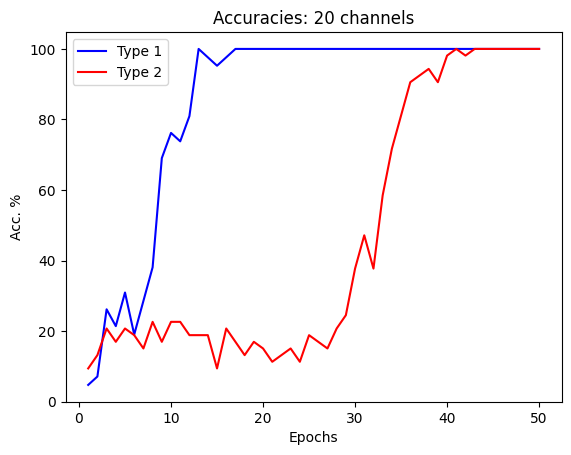

In [170]:
x = epochs
y1 = accuracies_type1
y2 = accuracies_type2

plt.plot(x, y1, linestyle='-', color='b', label="Type 1")  # Blue line
plt.plot(x, y2, linestyle='-', color='r', label="Type 2")  # Red line

plt.xlabel("Epochs")
plt.ylabel("Acc. %")
plt.title("Accuracies: 20 channels")
plt.legend()

plt.show()

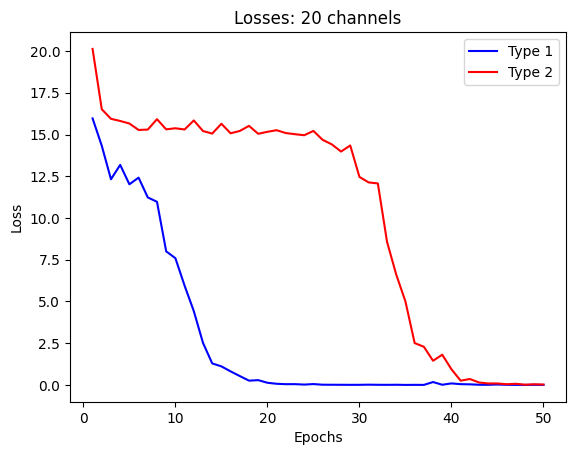

In [171]:
x = epochs
y1 = losses_type1
y2 = losses_type2

plt.plot(x, y1, linestyle='-', color='b', label="Type 1")  # Blue line
plt.plot(x, y2, linestyle='-', color='r', label="Type 2")  # Red line

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Losses: 20 channels")
plt.legend()

plt.show()

# 4 channels

In [194]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("mps") if torch.backends.mps.is_available() and torch.backends.mps.is_built() else device
model_1 = QuantumMNISTCNN().to(device)
# model_1 = QuantumMNISTClassifierV2().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_1.parameters(), lr=0.001)

accuracies_type2__4 = []
losses_type2__4 = []

# Training Loop
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0
    
    for images, labels in dataloader_type2_extended__4:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model_1(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss:.4f}, Accuracy: {accuracy:.2f}%")

    accuracies_type2__4.append(accuracy)
    losses_type2__4.append(running_loss)

Epoch [1/50], Loss: 39.5893, Accuracy: 21.13%
Epoch [2/50], Loss: 38.6577, Accuracy: 19.25%
Epoch [3/50], Loss: 36.8567, Accuracy: 18.49%
Epoch [4/50], Loss: 34.7090, Accuracy: 25.28%
Epoch [5/50], Loss: 35.3558, Accuracy: 17.74%
Epoch [6/50], Loss: 33.7914, Accuracy: 22.26%
Epoch [7/50], Loss: 34.8407, Accuracy: 20.75%
Epoch [8/50], Loss: 34.2474, Accuracy: 24.15%
Epoch [9/50], Loss: 34.8441, Accuracy: 18.87%
Epoch [10/50], Loss: 33.6714, Accuracy: 18.11%
Epoch [11/50], Loss: 34.1210, Accuracy: 16.98%
Epoch [12/50], Loss: 32.7000, Accuracy: 18.49%
Epoch [13/50], Loss: 33.4569, Accuracy: 20.38%
Epoch [14/50], Loss: 33.5575, Accuracy: 21.51%
Epoch [15/50], Loss: 33.1029, Accuracy: 18.11%
Epoch [16/50], Loss: 32.9381, Accuracy: 25.28%
Epoch [17/50], Loss: 32.9106, Accuracy: 18.11%
Epoch [18/50], Loss: 33.2304, Accuracy: 21.51%
Epoch [19/50], Loss: 33.1125, Accuracy: 20.38%
Epoch [20/50], Loss: 33.0711, Accuracy: 23.02%
Epoch [21/50], Loss: 33.1296, Accuracy: 21.51%
Epoch [22/50], Loss: 3

In [196]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("mps") if torch.backends.mps.is_available() and torch.backends.mps.is_built() else device
model_1 = QuantumMNISTCNN().to(device)
# model_1 = QuantumMNISTClassifierV2().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_1.parameters(), lr=0.001)

accuracies_type1__4 = []
losses_type1__4 = []

# Training Loop
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0
    
    for images, labels in dataloader_type1_extended__4:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model_1(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss:.4f}, Accuracy: {accuracy:.2f}%")

    accuracies_type1__4.append(accuracy)
    losses_type1__4.append(running_loss)

Epoch [1/50], Loss: 32.9946, Accuracy: 14.76%
Epoch [2/50], Loss: 29.0582, Accuracy: 27.62%
Epoch [3/50], Loss: 30.2621, Accuracy: 22.86%
Epoch [4/50], Loss: 28.5813, Accuracy: 21.43%
Epoch [5/50], Loss: 27.7944, Accuracy: 30.00%
Epoch [6/50], Loss: 26.1371, Accuracy: 31.43%
Epoch [7/50], Loss: 25.9495, Accuracy: 31.90%
Epoch [8/50], Loss: 25.9680, Accuracy: 34.29%
Epoch [9/50], Loss: 25.7742, Accuracy: 30.00%
Epoch [10/50], Loss: 26.0598, Accuracy: 35.24%
Epoch [11/50], Loss: 24.2898, Accuracy: 35.24%
Epoch [12/50], Loss: 24.4667, Accuracy: 31.90%
Epoch [13/50], Loss: 24.1976, Accuracy: 36.19%
Epoch [14/50], Loss: 24.1868, Accuracy: 29.52%
Epoch [15/50], Loss: 25.3236, Accuracy: 34.76%
Epoch [16/50], Loss: 24.3768, Accuracy: 37.62%
Epoch [17/50], Loss: 24.6048, Accuracy: 35.24%
Epoch [18/50], Loss: 24.6625, Accuracy: 35.24%
Epoch [19/50], Loss: 23.4468, Accuracy: 38.10%
Epoch [20/50], Loss: 23.3043, Accuracy: 40.00%
Epoch [21/50], Loss: 23.0624, Accuracy: 37.14%
Epoch [22/50], Loss: 2

## 5 channels

In [201]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("mps") if torch.backends.mps.is_available() and torch.backends.mps.is_built() else device
model_1 = QuantumMNISTCNN().to(device)
# model_1 = QuantumMNISTClassifierV2().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_1.parameters(), lr=0.001)

accuracies_type2__5 = []
losses_type2__5 = []

# Training Loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0
    
    for images, labels in dataloader_type2_extended__5:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model_1(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss:.4f}, Accuracy: {accuracy:.2f}%")

    accuracies_type2__5.append(accuracy)
    losses_type2__5.append(running_loss)

Epoch [1/100], Loss: 33.3846, Accuracy: 15.57%
Epoch [2/100], Loss: 31.7843, Accuracy: 20.28%
Epoch [3/100], Loss: 29.1472, Accuracy: 23.11%
Epoch [4/100], Loss: 29.1746, Accuracy: 21.23%
Epoch [5/100], Loss: 29.0520, Accuracy: 21.23%
Epoch [6/100], Loss: 29.8181, Accuracy: 17.92%
Epoch [7/100], Loss: 29.4126, Accuracy: 22.64%
Epoch [8/100], Loss: 28.6807, Accuracy: 22.17%
Epoch [9/100], Loss: 28.7619, Accuracy: 18.87%
Epoch [10/100], Loss: 27.2539, Accuracy: 20.75%
Epoch [11/100], Loss: 28.7538, Accuracy: 24.06%
Epoch [12/100], Loss: 28.7187, Accuracy: 20.28%
Epoch [13/100], Loss: 29.5655, Accuracy: 19.34%
Epoch [14/100], Loss: 27.5952, Accuracy: 24.06%
Epoch [15/100], Loss: 26.4940, Accuracy: 27.83%
Epoch [16/100], Loss: 26.6778, Accuracy: 25.94%
Epoch [17/100], Loss: 26.4652, Accuracy: 25.94%
Epoch [18/100], Loss: 26.5091, Accuracy: 27.83%
Epoch [19/100], Loss: 27.5694, Accuracy: 30.19%
Epoch [20/100], Loss: 26.8190, Accuracy: 26.42%
Epoch [21/100], Loss: 26.8739, Accuracy: 22.64%
E

In [202]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("mps") if torch.backends.mps.is_available() and torch.backends.mps.is_built() else device
model_1 = QuantumMNISTCNN().to(device)
# model_1 = QuantumMNISTClassifierV2().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_1.parameters(), lr=0.001)

accuracies_type1__5 = []
losses_type1__5 = []

# Training Loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0
    
    for images, labels in dataloader_type1_extended__5:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model_1(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss:.4f}, Accuracy: {accuracy:.2f}%")

    accuracies_type1__5.append(accuracy)
    losses_type1__5.append(running_loss)

Epoch [1/100], Loss: 26.3607, Accuracy: 19.64%
Epoch [2/100], Loss: 23.4256, Accuracy: 19.05%
Epoch [3/100], Loss: 20.9185, Accuracy: 27.98%
Epoch [4/100], Loss: 21.6070, Accuracy: 32.74%
Epoch [5/100], Loss: 20.9458, Accuracy: 22.62%
Epoch [6/100], Loss: 20.5077, Accuracy: 33.33%
Epoch [7/100], Loss: 20.1636, Accuracy: 29.76%
Epoch [8/100], Loss: 20.2109, Accuracy: 34.52%
Epoch [9/100], Loss: 20.0313, Accuracy: 27.98%
Epoch [10/100], Loss: 19.7580, Accuracy: 31.55%
Epoch [11/100], Loss: 18.8895, Accuracy: 35.12%
Epoch [12/100], Loss: 19.2043, Accuracy: 35.71%
Epoch [13/100], Loss: 19.0187, Accuracy: 36.31%
Epoch [14/100], Loss: 18.6077, Accuracy: 34.52%
Epoch [15/100], Loss: 18.5972, Accuracy: 38.10%
Epoch [16/100], Loss: 18.4117, Accuracy: 36.90%
Epoch [17/100], Loss: 19.1049, Accuracy: 36.90%
Epoch [18/100], Loss: 18.3498, Accuracy: 36.31%
Epoch [19/100], Loss: 18.4565, Accuracy: 36.31%
Epoch [20/100], Loss: 18.2031, Accuracy: 38.10%
Epoch [21/100], Loss: 18.2908, Accuracy: 37.50%
E

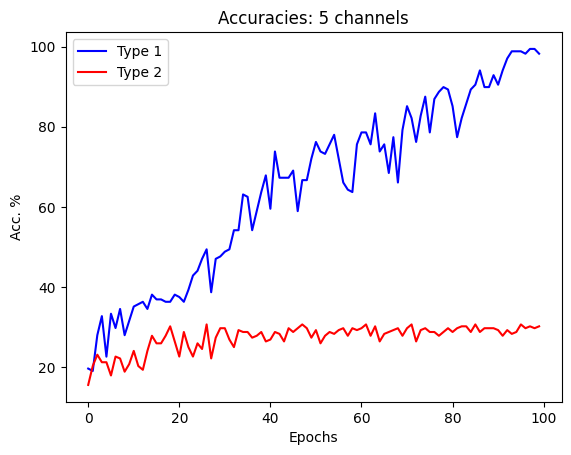

In [204]:
x = [i for i in range(100)]
y1 = accuracies_type1__5
y2 = accuracies_type2__5

plt.plot(x, y1, linestyle='-', color='b', label="Type 1")  # Blue line
plt.plot(x, y2, linestyle='-', color='r', label="Type 2")  # Red line

plt.xlabel("Epochs")
plt.ylabel("Acc. %")
plt.title("Accuracies: 5 channels")
plt.legend()

plt.show()

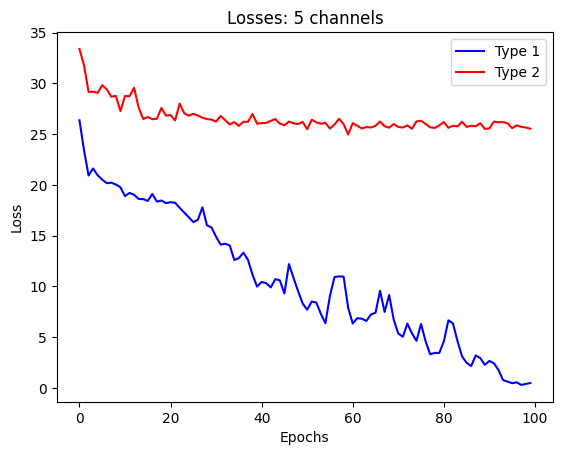

In [205]:
x = [i for i in range(100)]
y1 = losses_type1__5
y2 = losses_type2__5

plt.plot(x, y1, linestyle='-', color='b', label="Type 1")  # Blue line
plt.plot(x, y2, linestyle='-', color='r', label="Type 2")  # Red line

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Losses: 5 channels")
plt.legend()

plt.show()

In [209]:
accuracies_type2

[9.433962264150944,
 13.20754716981132,
 20.754716981132077,
 16.9811320754717,
 20.754716981132077,
 18.867924528301888,
 15.09433962264151,
 22.641509433962263,
 16.9811320754717,
 22.641509433962263,
 22.641509433962263,
 18.867924528301888,
 18.867924528301888,
 18.867924528301888,
 9.433962264150944,
 20.754716981132077,
 16.9811320754717,
 13.20754716981132,
 16.9811320754717,
 15.09433962264151,
 11.320754716981131,
 13.20754716981132,
 15.09433962264151,
 11.320754716981131,
 18.867924528301888,
 16.9811320754717,
 15.09433962264151,
 20.754716981132077,
 24.528301886792452,
 37.735849056603776,
 47.16981132075472,
 37.735849056603776,
 58.490566037735846,
 71.69811320754717,
 81.13207547169812,
 90.56603773584905,
 92.45283018867924,
 94.33962264150944,
 90.56603773584905,
 98.11320754716981,
 100.0,
 98.11320754716981,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0]